# K-Mean clustering on the Eron data

In [29]:
import sklearn

max exercised_stock_options = 34348384, min exercised_stock_options = 3285
max salary = 1111258, min salary = 477


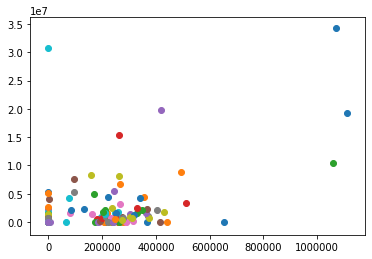

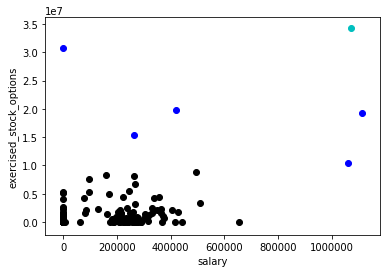

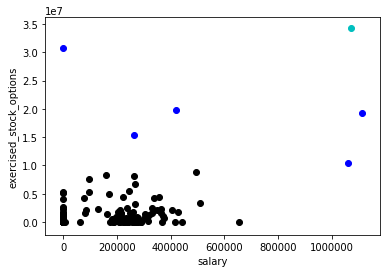

[6680544, 4890344, 651850, 5538001, 493489, 1104054, 608750, 880290, 2282768, 765313, 2218275, 372205, 1056320, 185063, 1030329, 4346544, 81042, 3285, 1441898, 1465734, 1635238, 98718, 601438, 850477, 4158995, 1624396, 2027865, 436515, 4046157, 371750, 607837, 1835558, 1624396, 412878, 17378, 3282960, 1623010, 2291113, 1362375, 139130, 2549361, 34348384, 1637034, 757301, 83237, 257817, 187500, 940257, 1753766, 5210569, 9803, 664461, 59539, 7509039, 1599641, 953136, 8191755, 1451869, 4452476, 343434, 19794175, 850010, 117551, 5266578, 19250000, 1426469, 886231, 2022048, 1324578, 1668260, 1297049, 5127155, 1729541, 281073, 431750, 506765, 754966, 4160672, 28798, 2604490, 825464, 192758, 400478, 636246, 8308552, 30766064, 1550019, 8831913, 10433518, 15364167, 664375, 176378, 759557, 671737, 2165172, 591250, 2070306, 2542813, 3181250, 765920, 384728]


In [35]:
#!/usr/bin/python3

""" 
    skeleton code for k-means clustering mini-project

"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys

from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset_unix.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

## load the exercised_stock_options from the dictionary and find the min and max value in the list
exercised_stock_options = []
for keys in data_dict.keys():
    if data_dict[keys]["exercised_stock_options"] == "NaN":
        continue
    else:
        exercised_stock_options.append(data_dict[keys]["exercised_stock_options"])
exercised_stock_options_numpy = numpy.array(exercised_stock_options)
print("max exercised_stock_options = {}, min exercised_stock_options = {}".format(exercised_stock_options_numpy.max(), exercised_stock_options_numpy.min()))

## load the salary from the dictionary and find the min and max value in the list
salary = []
for keys in data_dict.keys():
    if data_dict[keys]["salary"] == "NaN":
        continue
    else:
        salary.append(data_dict[keys]["salary"])
salary_numpy = numpy.array(salary)
print("max salary = {}, min salary = {}".format(salary_numpy.max(), salary_numpy.min()))


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2)
plt.show()



from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2, feature_3]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=3)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

##scaling salary and exercised_stock_options
from sklearn import preprocessing
maxminscale = preprocessing.minmax_scale(salary_numpy)
##print(maxminscale)
print(list(exercised_stock_options_numpy))
for i in range(len(salary_numpy)):
    if float(salary_numpy [i]) == 200000.0:
        print (maxminscale[i])





In [39]:
##scaling salary and exercised_stock_options
from sklearn import preprocessing
maxminscale = preprocessing.minmax_scale(salary_numpy)
print(maxminscale)
#print(list(exercised_stock_options_numpy))
for i in range(len(salary_numpy)):
    if float(salary_numpy [i]) == 200000.0:
        print (maxminscale[200000.0])

[0.32887761 0.24003381 0.15346319 0.21859935 0.24002571 0.33307286
 0.33638314 0.17700519 0.11725714 0.22332845 0.23137684 0.25933555
 0.22612648 0.25934995 0.05695722 0.32104798 0.24394097 0.27335091
 0.16875064 0.19189021 0.22391813 0.20782945 0.16363982 0.19023642
 0.20150507 0.24601519 0.30502052 0.1945523  0.18907687 0.24523556
 0.         0.24181094 0.38558726 0.19028683 0.1851346  0.15643858
 0.45903468 0.32820241 0.32831494 0.14611521 0.21244512 0.96494629
 0.23500492 0.29582879 0.16602913 0.17242913 0.23603753 0.27378124
 0.25038599 0.17886514 0.08675247 0.07232839 0.19222691 0.23615006
 0.18924973 0.19951368 0.39631665 0.21580492 0.37825548 0.24723505
 0.28251383 0.08504287 0.21518643 1.         0.00552584 0.25937786
 0.36358292 0.23363651 0.28544421 0.18138409 0.22296834 0.23671273
 0.06835011 0.58927907 0.2352687  0.22285221 0.2059875  0.20838401
 0.19853238 0.14217564 0.22472747 0.44283977 0.95469314 0.23533172
 0.21533858 0.27860487 0.07633998 0.22224093 0.31420235 0.2971